# **Codig Dojo**: reto kaggle

- Fecha de creación: 2022-01-22
- Fecha de modificación: 2022-01-16

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels import OLS

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


import datawig
plt.rcParams['figure.dpi'] = 100


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df2 = pd.concat([df_train, df_test], keys=[0,1])

In [3]:
print(df_train.shape, df_test.shape)

(1460, 81) (1459, 80)


In [4]:
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
  1        2          20       RL         80.0     9600   Pave   NaN      Reg   
  2        3          60       RL         68.0    11250   Pave   NaN      IR1   
  3        4          70       RL         60.0     9550   Pave   NaN      IR1   
  4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1 1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
  1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
  1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
  1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
  1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0 0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...            ...       ...  ...      ...    ...    ...         ...     ...   
1 1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
  1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
  1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

       MoSold YrSold  SaleType  SaleCondition  SalePrice  
0 0         2   2008        WD         Normal   208500.0  
  1         5   2007        WD         Normal   181500.0  
  2         9   2008        WD         Normal   223500.0  
  3         2   2006        WD        Abnorml   140000.0  
  4        12   2008        WD         Normal   250000.0  
...       ...    ...       ...            ...        ...  
1 1454      6   2006        WD         Normal        NaN  
  1455      4   2006        WD        Abnorml        NaN  
  1456      9   2006        WD        Abnorml        NaN  
  1457      7   2006        WD         Normal        NaN  
  1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [5]:
perdidos = df_train.isna().sum()/df_train.shape[0]

In [6]:
perdidos.to_clipboard()
perdidos

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.shape

(1460, 81)

In [9]:
def limpiar(df):
    dft = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence',
            'MiscFeature', 'LotFrontage'], axis=1)
        
    sub = [i for i in dft.columns if 'SalePrice' not in i ]
    return dft #.dropna(subset=sub)


# intento 1

In [10]:
df = limpiar(df_train)

In [11]:
df.dtypes.to_clipboard()

In [12]:
df.corr()['SalePrice'].to_clipboard()

In [13]:
yvar = 'SalePrice'
xvar = list(df.select_dtypes(['int','float']).columns)[1:-1]

eliminadas = 'TotalBsmtSF'
xvar.remove(eliminadas)

In [14]:
xvar = ['OverallQual','GrLivArea','GarageCars','GarageArea','1stFlrSF','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',]

In [15]:
formula = yvar+'~1+'+'+'.join(xvar)

In [16]:
ols1 = OLS.from_formula(formula=formula, data=df).fit()

In [17]:
ols1

OLS Estimation Summary                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                      0.7737
Estimator:                        OLS   Adj. R-squared:                 0.7721
No. Observations:                1460   F-statistic:                    2404.3
Date:                Wed, Feb 23 2022   P-value (F-stat)                0.0000
Time:                        19:57:13   Distribution:                 chi2(10)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept    -1.186e+06  1.276e+05    -9.2988     0.0000  -1.436e+06  -9.362e+05
1stFlrSF         14.174     5.7868     2.4493     0.0143      2.8317      25.516
FullBath        -6790.9     3853.6    -1.7622     0.0780  -1.434e+04      762.11
GarageArea       14.948     20.489     0.7295     0.4657     -25.211      55.106
GarageCars    1.042e+04     7147.5     1.4576     0.1450     -3591.0   2.443e+04
GrLivArea        51.297     14.654     3.5005     0.0005      22.576      80.019
OverallQual    1.96e+04     1999.4     9.8050     0.0000   1.569e+04   2.352e+04
TotRmsAbvGrd     33.105     2422.6     0.0137     0.9891     -4715.1      4781.3
TotalBsmtSF      19.865     11.559     1.7185     0.0857     -2.7910      42.521
YearBuilt        268.24     50.182     5.3453     0.0000      169.89      366.60
YearRemodAdd     296.48     51.000     5.8134     0.0000      196.52      396.44
================================================================================
OLSResults, id: 0x1c1e6dfaf20

In [18]:
pred1 = ols1.predict(data=df_test.fillna(0))
pred1['Id'] = df_test.Id
pred1 = pred1.set_index('Id').rename(columns={})
pred1.to_csv('pred1.csv')

# intento 2

In [85]:
df3 = pd.get_dummies(limpiar(df2.drop('Id', axis=1))).reset_index().drop('level_1', axis=1)

df_rf = df3[df3['level_0']==0].drop('level_0', axis=1).interpolate(method='linear')
df_rf_test = df3[df3['level_0']==1].drop('level_0', axis=1).drop('SalePrice', axis=1)

In [86]:
X = df_rf.drop('SalePrice', axis=1) #.values.reshape(-1, 1)
y = df_rf['SalePrice']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1357)

In [88]:
# est_range = range(5, 100, 10)
# scores = []
# for est in est_range:
#     rf = RandomForestRegressor(random_state=13579, bootstrap=True, n_estimators=est)
#     rf.fit(X_train, y_train)
#     scores.append(rf.score(X_test, y_test))
    

Optimizar el número de estimators

In [93]:
est_range = range(5, 200, 5)
scores = []
for est in est_range:
    rf = RandomForestRegressor(random_state=13579, bootstrap=True, n_estimators=est, n_jobs=32)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    

<AxesSubplot:>

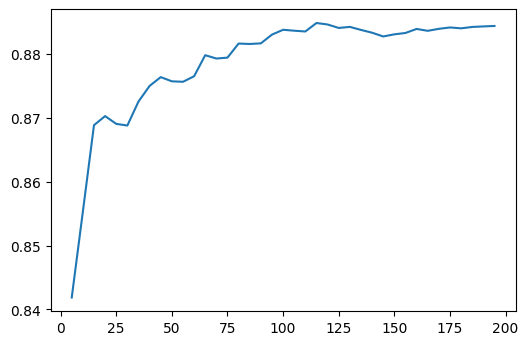

In [94]:
sns.lineplot(x=est_range, y=scores)

In [100]:
pd.DataFrame({'nest':est_range, 'score':scores}).sort_values('score', ascending=False).head(1)

,nest,score
22,115,0.884874


Optimizar la profundidad

In [104]:
dep_range = range(1, 30, 1)
scores2 = []
for est in dep_range:
    rf = RandomForestRegressor(random_state=13579, bootstrap=True, n_estimators=115, max_depth=est, n_jobs=16)
    rf.fit(X_train, y_train)
    scores2.append(rf.score(X_test, y_test))
    

<AxesSubplot:>

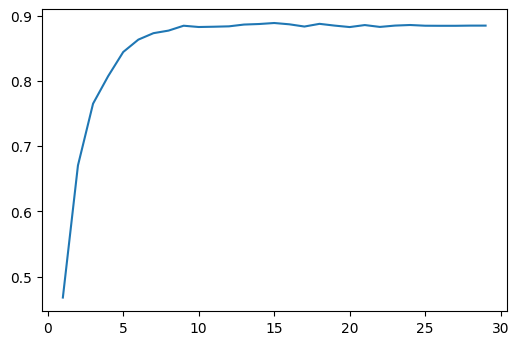

In [105]:
sns.lineplot(x=dep_range, y=scores2)

In [106]:
pd.DataFrame({'dep':dep_range, 'score2':scores2}).sort_values('score2', ascending=False).head(1)

,dep,score2
14,15,0.888875


Optimizar el min_samples_leaf

In [120]:
msl_range = ['squared_error', 'absolute_error', 'poisson']
scores3 = []
for est in msl_range:
    rf = RandomForestRegressor(random_state=13579, bootstrap=True, n_estimators=115, max_depth=15, criterion=est,n_jobs=32)
    rf.fit(X_train, y_train)
    scores3.append(rf.score(X_test, y_test))

<AxesSubplot:>

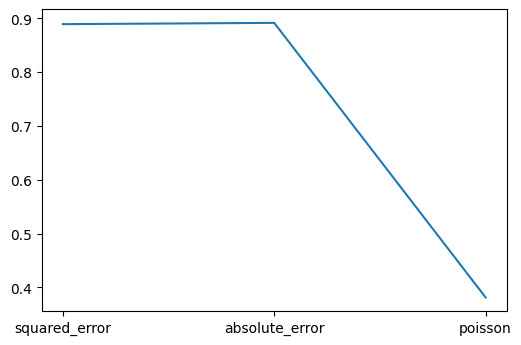

In [121]:
sns.lineplot(x=msl_range, y=scores3)

In [123]:
pd.DataFrame({'dep':msl_range, 'score2':scores3}).sort_values('score2', ascending=False).head(3)

,dep,score2
1,absolute_error,0.891262
0,squared_error,0.888875
2,poisson,0.381492


GridSearch

In [ ]:
gs = GridSearchCV()

Modelo final RF

In [124]:
rf = RandomForestRegressor(random_state=13579, bootstrap=True, n_estimators=115, max_depth=15, n_jobs=32)
rf.fit(X, y)

RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      n_estimators=115, n_jobs=32, random_state=13579)

In [125]:
pred2 = rf.predict(df_rf_test.interpolate(method = 'linear'))
pred2 = pd.DataFrame(pred2)
pred2['Id'] = df_test.Id
pred2 = pred2[['Id',0]]
pred2.columns = ['Id','SalePrice']
pred2.to_csv('pred6.csv', index=None)

## KNN REGRESS

In [65]:
knn_range = range(1,20)
scoresknn = []
for i in knn_range:
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', n_jobs=16)
    knn.fit(X_train, y_train)
    scoresknn.append(knn.score(X_test, y_test))


C:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

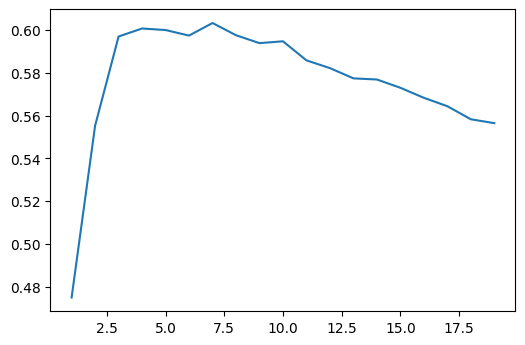

In [66]:
sns.lineplot(knn_range, scoresknn)

In [67]:
pd.DataFrame({'knn':knn_range, 'score_knn':scoresknn}).sort_values('score_knn', ascending=False)

,knn,score_knn
6,7,0.603401
3,4,0.600825
4,5,0.600109
7,8,0.597682
5,6,0.597510
2,3,0.597073
9,10,0.594838
8,9,0.593973
10,11,0.585905
11,12,0.582279


In [74]:
pred4 = knn.predict(df_rf_test.fillna(0))
pred4 = pd.DataFrame(pred4)
pred4['Id'] = df_test.Id
pred4 = pred4[['Id',0]]
pred4.columns = ['Id','SalePrice']
pred4.to_csv('pred4.csv', index=None)